In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from imageio import imread
from skimage.color import rgb2gray
from skimage.feature import canny
from skimage.morphology import binary_opening, binary_closing
from skimage.color import label2rgb
from skimage.measure import find_contours, label, regionprops
from scipy.ndimage.morphology import binary_fill_holes

Check  data1.jpg


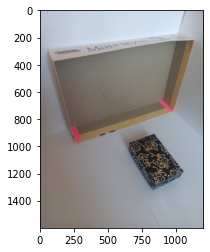

WIDTH_B =  181.20000000000005
HEIGHT_B =  247.20000000000005
WIDTH_A =  699.2
HEIGHT_A =  98.20000000000005
Check:
Width A >= width B


False


res_no =  0
Check  data2.jpg


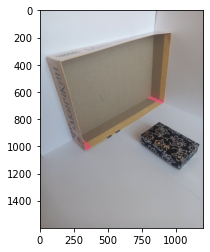

WIDTH_B =  121.20000000000005
HEIGHT_B =  145.20000000000005
WIDTH_A =  520.8
HEIGHT_A =  58.200000000000045
Check:
Width A >= width B


False


res_no =  0
Check  data3.jpg


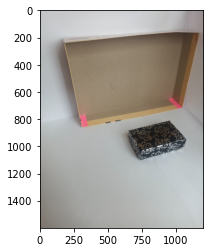

WIDTH_B =  302.20000000000005
HEIGHT_B =  119.20000000000005
WIDTH_A =  711.2
HEIGHT_A =  70.20000000000005
Check:
Width A >= width B


False


res_no =  0
Check  data4.jpg


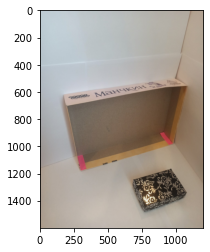

WIDTH_B =  270.20000000000005
HEIGHT_B =  146.20000000000005
WIDTH_A =  650.2
HEIGHT_A =  92.20000000000005
Check:
Width A >= width B


False


res_no =  0
Check  data5.jpg


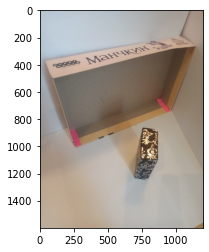

WIDTH_B =  93.20000000000005
HEIGHT_B =  27.200000000000045
WIDTH_A =  674.2
HEIGHT_A =  113.20000000000005
Check:
Width A >= width B
Height A >= height B


True


res_no =  1
Check  data6.jpg


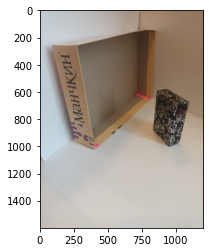

WIDTH_B =  115.20000000000005
HEIGHT_B =  86.20000000000005
WIDTH_A =  321.20000000000005
HEIGHT_A =  24.200000000000045
Check:
Width A >= width B


False


res_no =  0
Check  data7.jpg


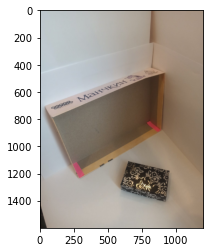

WIDTH_B =  22.200000000000045
HEIGHT_B =  59.200000000000045
WIDTH_A =  524.2
HEIGHT_A =  95.20000000000005
Check:
Width A >= width B
Height A >= height B


True


res_no =  1
Check  data8.jpg


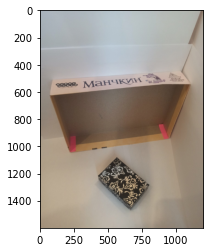

WIDTH_B =  107.20000000000005
HEIGHT_B =  172.20000000000005
WIDTH_A =  694.2
HEIGHT_A =  90.20000000000005
Check:
Width A >= width B


False


res_no =  0
Check  data9.jpg


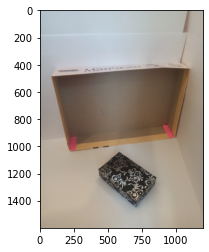

WIDTH_B =  123.20000000000005
HEIGHT_B =  167.20000000000005
WIDTH_A =  737.2
HEIGHT_A =  79.20000000000005
Check:
Width A >= width B


False


res_no =  0
Check  data10.jpg


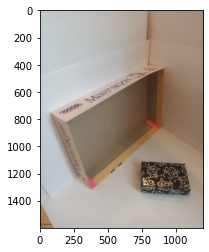

WIDTH_B =  8.200000000000045
HEIGHT_B =  177.20000000000005
WIDTH_A =  419.20000000000005
HEIGHT_A =  75.20000000000005
Check:
Width A >= width B


False


res_no =  0
Check  data11.jpg


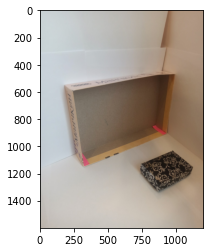

WIDTH_B =  221.20000000000005
HEIGHT_B =  100.20000000000005
WIDTH_A =  530.2
HEIGHT_A =  70.20000000000005
Check:
Width A >= width B


False


res_no =  0
Check  data12.jpg


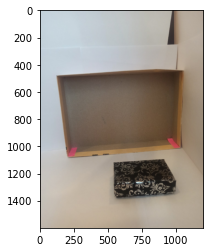

WIDTH_B =  395.20000000000005
HEIGHT_B =  147.20000000000005
WIDTH_A =  790.2
HEIGHT_A =  56.200000000000045
Check:
Width A >= width B


False


res_no =  0
Check  data13.jpg


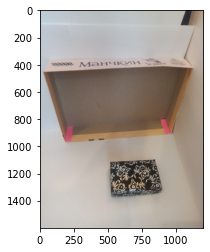

WIDTH_B =  299.20000000000005
HEIGHT_B =  183.20000000000005
WIDTH_A =  746.2
HEIGHT_A =  93.20000000000005
Check:
Width A >= width B


False


res_no =  0
Check  data14.jpg


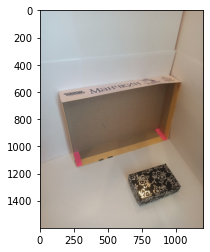

WIDTH_B =  257.20000000000005
HEIGHT_B =  139.20000000000005
WIDTH_A =  640.2
HEIGHT_A =  93.20000000000005
Check:
Width A >= width B


False


res_no =  0
Check  data15.jpg


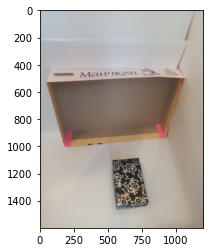

WIDTH_B =  190.20000000000005
HEIGHT_B =  293.20000000000005
WIDTH_A =  706.2
HEIGHT_A =  90.20000000000005
Check:
Width A >= width B


False


res_no =  0
Check  data16.jpg


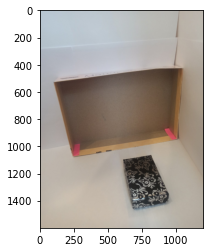

WIDTH_B =  212.20000000000005
HEIGHT_B =  273.20000000000005
WIDTH_A =  736.2
HEIGHT_A =  69.20000000000005
Check:
Width A >= width B


False


res_no =  0
Check  data17.jpg


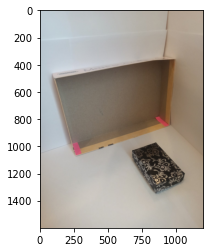

WIDTH_B =  168.20000000000005
HEIGHT_B =  210.20000000000005
WIDTH_A =  656.2
HEIGHT_A =  75.20000000000005
Check:
Width A >= width B


False


res_no =  0
Check  data18.jpg


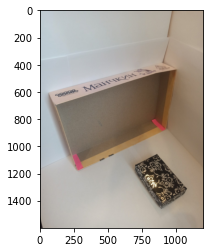

WIDTH_B =  152.20000000000005
HEIGHT_B =  226.20000000000005
WIDTH_A =  619.2
HEIGHT_A =  95.20000000000005
Check:
Width A >= width B


False


res_no =  0
Check  data1.jpg


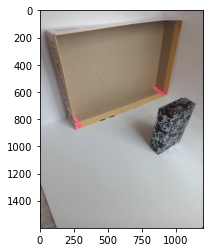

WIDTH_B =  227.20000000000005
HEIGHT_B =  34.200000000000045
WIDTH_A =  646.2
HEIGHT_A =  78.20000000000005
Check:
Width A >= width B
Height A >= height B


True


res_yes =  1
Check  data2.jpg


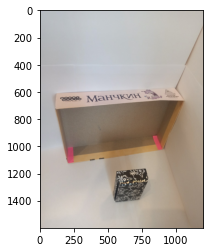

WIDTH_B =  196.20000000000005
HEIGHT_B =  42.200000000000045
WIDTH_A =  671.2
HEIGHT_A =  87.20000000000005
Check:
Width A >= width B
Height A >= height B


True


res_yes =  1
Check  data3.jpg


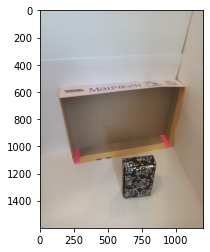

WIDTH_B =  190.20000000000005
HEIGHT_B =  45.200000000000045
WIDTH_A =  683.2
HEIGHT_A =  78.20000000000005
Check:
Width A >= width B
Height A >= height B


True


res_yes =  1
Check  data4.jpg


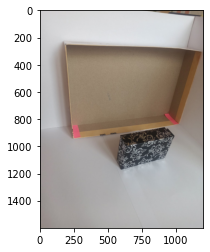

WIDTH_B =  344.20000000000005
HEIGHT_B =  43.200000000000045
WIDTH_A =  739.2
HEIGHT_A =  76.20000000000005
Check:
Width A >= width B
Height A >= height B


True


res_yes =  1
Check  data5.jpg


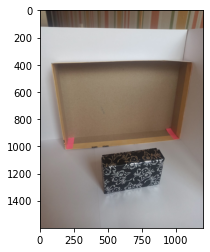

WIDTH_B =  136.20000000000005
HEIGHT_B =  61.200000000000045
WIDTH_A =  797.2
HEIGHT_A =  66.20000000000005
Check:
Width A >= width B
Height A >= height B


True


res_yes =  1
Check  data6.jpg


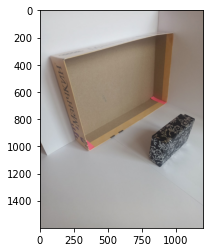

WIDTH_B =  228.20000000000005
HEIGHT_B =  24.200000000000045
WIDTH_A =  521.8
HEIGHT_A =  51.200000000000045
Check:
Width A >= width B
Height A >= height B


True


res_yes =  1
Check  data7.jpg


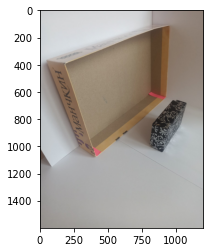

WIDTH_B =  159.20000000000005
HEIGHT_B =  12.200000000000045
WIDTH_A =  455.8
HEIGHT_A =  46.200000000000045
Check:
Width A >= width B
Height A >= height B


True


res_yes =  1
Check  data8.jpg


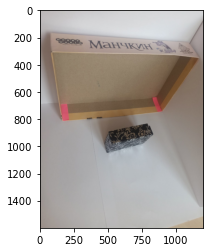

WIDTH_B =  293.20000000000005
HEIGHT_B =  43.200000000000045
WIDTH_A =  702.2
HEIGHT_A =  98.20000000000005
Check:
Width A >= width B
Height A >= height B


True


res_yes =  1
Result is true! (False)


Result is true! (False)


Result is true! (False)


Result is true! (False)


Result is false! (False)


Result is true! (False)


Result is false! (False)


Result is true! (False)


Result is true! (False)


Result is true! (False)


Result is true! (False)


Result is true! (False)


Result is true! (False)


Result is true! (False)


Result is true! (False)


Result is true! (False)


Result is true! (False)


Result is true! (False)


Result is true! (True)


Result is true! (True)


Result is true! (True)


Result is true! (True)


Result is true! (True)


Result is true! (True)


Result is true! (True)


Result is true! (True)


count_yes =  24
count_no =  2
accuracy =  0.9230769230769231


In [13]:
#Работа алгоритма на всем датасете
result_yes = []
result_no = []
pair = []
count_no = 0
count_yes = 0
all_count_yes = 8
all_count_no = 18

#Пробегаемся по датасету с меткой Нет (т.е. коробочка не помещается в большую коробку), высчитываем и запоминаем результат
for i in range(1, all_count_no+1):
    img_name = "data" + str(i) + ".jpg"
    print("Check ", img_name)
    res_no = main_function("dataset\\no\\" + img_name)
    print("res_no = ", res_no)
    pair.append(i)
    pair.append(res_no)
    result_no.append(pair)
    pair = []

#Пробегаемся по датасету с меткой Да (т.е. коробочка помещается в большую коробку), высчитываем и запоминаем результат
for i in range(1, all_count_yes+1):
    img_name = "data" + str(i) + ".jpg"
    print("Check ", img_name)
    res_yes = main_function("dataset\\yes\\" + img_name)
    print("res_yes = ", res_yes)
    pair.append(i)
    pair.append(res_yes)
    result_yes.append(pair)
    pair = []
    
#Правильно ли определили, что коробка НЕ помещается
for i in range(len(result_no)):
    if result_no[i][1] == 0:
        print("Result is true! (False)")
        count_yes = count_yes + 1
    else:
        print("Result is false! (False)")
        count_no = count_no + 1
    print("\n")
    
#Правильно ли определили, что коробка помещается
for i in range(len(result_yes)):
    if result_yes[i][1] == 1:
        print("Result is true! (True)")
        count_yes = count_yes + 1
    else:
        print("Result is false! (True)")
        count_no = count_no + 1
    print("\n")

#Точность работы алгоритма
print("count_yes = ", count_yes)
print("count_no = ", count_no)
print("accuracy = ", count_yes / (all_count_yes + all_count_no))

Check  data3.jpg


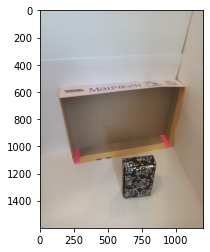

WIDTH_B =  190.20000000000005
HEIGHT_B =  45.200000000000045
WIDTH_A =  683.2
HEIGHT_A =  78.20000000000005
Check:
Width A >= width B
Height A >= height B


True


res =  1


In [43]:
#Работа алгоритма на одном изображении
img_name = "data3.jpg"
print("Check ", img_name)
res = main_function("dataset\\yes\\" + img_name)
print("res = ", res)

In [1]:
def main_function(name_file):
    WIDTH_A, WIDTH_B, HEIGHT_A, HEIGHT_B = 0, 0, 0, 0
    contours_img, mask_img = download(name_file) #Ищем контуры маленькой коробочки
    WIDTH_B, HEIGHT_B = calculate_B(contours_img, mask_img) #Вычисление итогой ширины и длины маленькой коробки
    contours_pink, mask_pink = download_pink(name_file) #Ищем контуры розовых меток на большой коробке
    WIDTH_A, HEIGHT_A = calculate_A(contours_pink, mask_pink) #Вычисление итоговой ширины и длины большой коробки
    res = check_result(WIDTH_A, HEIGHT_A, WIDTH_B, HEIGHT_B) #Сравнение результатов коробок
    return res
    

In [2]:
def download(name_file):
    img = imread(name_file)
    img_gray = rgb2gray(img)

    binary_img = binary_closing(canny(img_gray, sigma=2), selem=np.ones((6, 6))) #1.5;2
    img_segment = binary_fill_holes(binary_img)
    mask_img = binary_opening(img_segment, selem=np.ones((40, 40)))#16;25

    plt.imshow(img)
    #plt.imshow(label2rgb(mask_img, image=img_gray))

    #Поиск контуров
    contours_img = find_contours(mask_img, level=0.8)

    #Отображение (слишком громоздко при запуске на всем датасете, поэтому закомментировано)
    #fig, ax = plt.subplots()
    #ax.imshow(mask_img, cmap=plt.cm.gray)

    #for contour in contours_img:
    #    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

    plt.show()
    
    return contours_img, mask_img

In [3]:
def find_area(mask, number): #Поиск индексов двух больших контуров на изображении
    largest_area = -1
    largest_contour_index = -1
    largest_area_2 = -1
    largest_contour_index_2 = -1
    labels = label(mask) 
    props = regionprops(labels) 
    areas = [prop.area for prop in props] 

    for i in range(len(areas)):
        if largest_area < areas[i]:
            largest_area = areas[i]
            largest_contour_index = i

    if number == 2:
        for i in range(len(areas)):
            if i != largest_contour_index:
                if largest_area_2 < areas[i]:
                    largest_area_2 = areas[i]
                    largest_contour_index_2 = i
    else:
        largest_area_2 = -1
        largest_contour_index_2 = -1
            
    return largest_contour_index, largest_contour_index_2

In [4]:
def find_min_max(contour): #Вычисление минимумом и максимумов по х и у
    max_x = contour[0]
    max_y = contour[0]
    min_x = contour[0]
    min_y= contour[0]
    for i in range(len(contour)):
        pair = contour[i]
        if max_x[1] < pair[1]:
            max_x = pair
        if min_x[1] > pair[1]:
            min_x = pair
        if min_y[0] < pair[0]:
            min_y = pair
        if max_y[0] > pair[0]:
            max_y = pair
    return max_x, max_y, min_x, min_y

In [5]:
def find_size(contours, mask_draw, number): #Нахождение ширины, длины и минимумом и максимумов по х и у
    index_1, index_2 = find_area(mask_draw, number)
    
    WIDTH, HEIGHT, MAX_X, MAX_Y, MIN_X, MIN_Y = [], [], [], [], [], []
    
    index = []
    index.append(index_1)
    
    if index_2 != -1: #Если нет второго контура, то пропускаем его соответственно
        index.append(index_2)
    
    for ind in index: #Бежим по контурам
        contour = contours[ind]
        max_x, max_y, min_x, min_y = find_min_max(contour)
        
        #print("max_x: blue = ", max_x)
        #print("min_x: yellow = ", min_x)
        #print("max_y: red = ", max_y)
        #print("min_y: green = ", min_y)
        
        #Отображение найденных точек на изображении
        #fig, ax = plt.subplots()
        #ax.imshow(mask_draw, cmap=plt.cm.gray)
        #for contour in contours:
        #    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

        #ax.plot(max_x[1], max_x[0], 'bo') #max_x --> самая правая
        #ax.plot(min_x[1], min_x[0], 'yo') #min_x --> самая левая
        #ax.plot(max_y[1], max_y[0], 'ro') #max_y --> самая верхняя
        #ax.plot(min_y[1], min_y[0], 'go') #min_y --> самая нижнаяя
        
        #plt.show()

        #Вычисление ширины и длины
        if number == 1:
            height = max_x[0] - max_y[0] #blue - red
        else:
            height = min_y[0] - min_x[0] #green - yellow
        width = max_x[1] - min_y[1] #blue - green
        
        #Добавляем полученные результаты в нужные списки
        WIDTH.append(width)
        HEIGHT.append(height)
        MAX_X.append(max_x)
        MAX_Y.append(max_y) 
        MIN_X.append(min_x)
        MIN_Y.append(min_y)
        
        
    
    return (WIDTH, HEIGHT), (MAX_X, MAX_Y, MIN_X, MIN_Y)

In [6]:
from matplotlib.patches import Rectangle

def calculate_B(contours_img, mask_img): #Вычисления для маленькой коробки (Объекта В)
    WIDTH_B, HEIGHT_B = 0, 0
    (Width_B, Height_B), (max_x_B, max_y_B, min_x_B, min_y_B)= find_size(contours_img, mask_img, 1)

    if len(Width_B) > 0 and len(Height_B) > 0:
        WIDTH_B = abs(Width_B[0])
        HEIGHT_B = abs(Height_B[0])
        print("WIDTH_B = ", WIDTH_B)
        print("HEIGHT_B = ", HEIGHT_B)
        #print(max_x_B)
        #print(max_y_B)
        #print(min_x_B)
        #print(min_y_B)
    else:
        print("Can't find contours in the image")

    return WIDTH_B, HEIGHT_B

In [7]:
def download_pink(name_file):

    img_pink = cv2.imread(name_file)

    PINK_MIN = np.array([145, 65, 65],np.uint8)
    PINK_MAX = np.array([179, 255, 255],np.uint8)

    hsv_img = cv2.cvtColor(img_pink,cv2.COLOR_BGR2HSV)

    pink_markers = cv2.inRange(hsv_img, PINK_MIN, PINK_MAX)

    mask_pink = binary_opening(pink_markers, selem=np.ones((10, 10)))

    #plt.imshow(mask_pink)

    #Поиск контуров
    contours_pink = find_contours(mask_pink, level=0.8)

    #Отображение
    #fig, ax = plt.subplots()
    #ax.imshow(pink_markers, cmap=plt.cm.gray)

    #for contour in contours_pink:
    #    ax.plot(contour[:, 1], contour[:, 0], linewidth=1)

    #plt.show()
    
    return contours_pink, mask_pink

In [8]:
def calculate_A(contours_pink, mask_pink): #Вычисления для большой коробки (Объект А)
    WIDTH_A, HEIGHT_A = 0, 0
    (Width_A, Height_A), (max_x_A, max_y_A, min_x_A, min_y_A) = find_size(contours_pink, mask_pink, 2)

    if len(Width_A) < 2 or len(Height_A) < 2 or len(max_x_A) < 2 or len(min_y_A) < 2:
        print("Can't find contours in the image")
    else:
        WIDTH_A = abs(max_x_A[1][1] - min_y_A[0][1]) #по х
        if abs(Height_A[0]) > abs(Height_A[1]):
            HEIGHT_A = abs(Height_A[0])
        else:
            HEIGHT_A = abs(Height_A[1])

        print("WIDTH_A = ", WIDTH_A)
        print("HEIGHT_A = ", HEIGHT_A)
        
    return WIDTH_A, HEIGHT_A

In [9]:
def check(Width_A, Height_A, Widht_B, Height_B): #Сравнение результатов
    print("Check:")
    if Width_A >= Widht_B:
        print("Width A >= width B")
        rW = 1
    else:
        print("WARNING: Weidth A < weidth B")
        rW = 0
    if Height_A >= Height_B:
        print("Height A >= height B")
        rH = 1
    else:
        print("WARNING: Height A < height B")
        rH = 0
    print("\n")
    return rW and rH

def check_result(WIDTH_A, HEIGHT_A, WIDTH_B, HEIGHT_B):
    if WIDTH_A != 0 and HEIGHT_A != 0 and WIDTH_B != 0 and HEIGHT_B != 0:
        res = check(WIDTH_A, HEIGHT_A, WIDTH_B, HEIGHT_B)
    else:
        print("ERROR: this image can't be processed")
        res = 0
    if res == 0:
        print("False")
    else:
        print("True")
    print("\n")
    return res

In [ ]:
def find_size2(contour, contours, mask_draw, number):
    
    #contour = contours[0]
    max_x = contour[0]
    max_y = contour[0]
    min_x = contour[0]
    min_y= contour[0]
    for i in range(len(contour)):
        pair = contour[i]
        if max_x[1] < pair[1]:
            max_x = pair
        if min_x[1] > pair[1]:
            min_x = pair
        if min_y[0] < pair[0]:
            min_y = pair
        if max_y[0] > pair[0]:
            max_y = pair

    print("blue = ", max_x)
    print("yellow = ", min_x)
    print("red = ", max_y)
    print("green = ", min_y)
    
    fig, ax = plt.subplots()
    ax.imshow(mask_draw, cmap=plt.cm.gray)
    for contour in contours:
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

    ax.plot(max_x[1], max_x[0], 'bo') #max_y --> самая правая (max_x)
    ax.plot(min_x[1], min_x[0], 'yo') #min_y --> самая левая (min_x)
    ax.plot(max_y[1], max_y[0], 'ro') #min_x --> самая верхняя (max_y)
    ax.plot(min_y[1], min_y[0], 'go') #max_x --> самая нижнаяя (min_y)
    
    if number == 1:
        #weidth = max_x[1] - min_x[1]   #b - y (blue - red?)
        weidth = max_x[1] - min_y[1] #по х    blue - green
        #height = min_y[0] - min_x[0]   #g - y
        #height = min_y[0] - max_y[0]   #g - r
        #height = max_x[0] - max_y[0] #по у b - r
    else:
        weidth = max_x[1] - min_y[1]
        #height = min_y[0] - min_x[0] #по у
    height = min_y[0] - min_x[0] #по у
    return weidth, height, max_x, max_y, min_x, min_y


#weidth = max_x[1] - min_y[1] #2
#height = min_y[0] - min_x[0] #по у #2

contour = contours_img[0]
leftmost = tuple([contour[:,0].argmin()])
rightmost = tuple([contour[:,0].argmax()])
topmost = tuple([contour[:,1].argmin()])
bottommost = contour[:,1].argmax()
bottommost_x = 0
bottom = []

for i in range(len(contour)):
    pair = contour[i]
    if bottommost == pair[0]:
        bottommost_x = pair[1]

bottom.append(bottommost)
bottom.append(bottommost_x)
ax.plot(bottom[1], bottom[0], 'bo')

print(leftmost)
print(rightmost)
print(topmost)
print(bottommost)
print(bottommost_x)
print(bottom)

blue =  [732.  974.2]
yellow =  [679.  874.8]
red =  [664.8 890. ]
green =  [747.2 958. ]
blue =  [953.  303.2]
yellow =  [875.  230.8]
red =  [854.8 254. ]
green =  [973.2 275. ]
Weidth_A =  699.2
Height_A =  98.20000000000005
max_x_A1 =  [732.  974.2]
min_y_A2 =  [973.2 275. ]
Height_A1 =  68.20000000000005
Height_A2 =  98.20000000000005
1
max_x(blue) =  [953.  303.2]
min_x(yellow) =  [875.  230.8]
max_y(red) =  [854.8 254. ]
min_y(green) =  [973.2 275. ]
0
max_x(blue) =  [732.  974.2]
min_x(yellow) =  [679.  874.8]
max_y(red) =  [664.8 890. ]
min_y(green) =  [747.2 958. ]
max_x_A[0] =  [953.  303.2]
min_y_A[1] =  [747.2 958. ]
Height_A[0] =  98.20000000000005
Height_A[1] =  68.20000000000005
WIDTH_A =  699.2
HEIGHT_A =  98.20000000000005
[array([953. , 303.2]), array([732. , 974.2])]
[array([854.8, 254. ]), array([664.8, 890. ])]
[array([875. , 230.8]), array([679. , 874.8])]
[array([973.2, 275. ]), array([747.2, 958. ])]


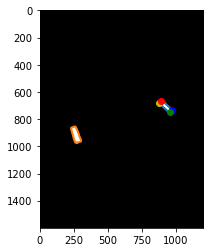

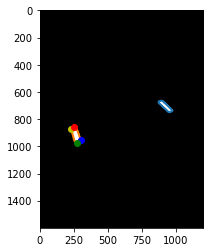

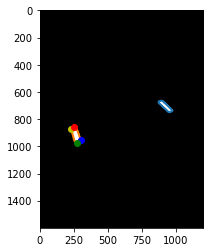

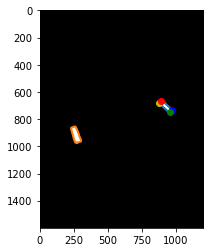

In [97]:
Weidth_A1, Height_A1, max_x_A1, max_y_A1, min_x_A1, min_y_A1 = find_size2(contours_pink[0], contours_pink, mask_pink, 2)
Weidtht_A2, Height_A2, max_x_A2, max_y_A2, min_x_A2, min_y_A2 = find_size2(contours_pink[1], contours_pink, mask_pink, 2)
d_11 = np.sqrt((max_x_A1[1] - max_y_A1[1])**2 + (max_x_A1[0] - max_y_A1[0])**2) #по у правильнее!!!

Weidth_A = max_x_A1[1] - min_y_A2[1] #по х
if Height_A1 > Height_A2:
    Height_A = Height_A1
else:
    Height_A = Height_A2

print("Weidth_A = ", Weidth_A)
print("Height_A = ", Height_A)
print("max_x_A1 = ", max_x_A1)
print("min_y_A2 = ", min_y_A2)
print("Height_A1 = ", Height_A1)
print("Height_A2 = ", Height_A2)

Width_A, Height_A, max_x_A, max_y_A, min_x_A, min_y_A = find(contours_pink, mask_pink, 2)

print("max_x_A[0] = ", max_x_A[0])
print("min_y_A[1] = ", min_y_A[1])
print("Height_A[0] = ", Height_A[0])
print("Height_A[1] = ", Height_A[1])

WIDTH_A = abs(max_x_A[1][1] - min_y_A[0][1]) #по х
if Height_A[0] > Height_A[1]:
    HEIGHT_A = Height_A[0]
else:
    HEIGHT_A = Height_A[1]

print("WIDTH_A = ", WIDTH_A)
print("HEIGHT_A = ", HEIGHT_A)

#print(Width_A)
#print(Height_A)
print(max_x_A)
print(max_y_A)
print(min_x_A)
print(min_y_A)

In [85]:
def find(contours, mask_draw, number):
    index_1, index_2 = find_area(mask_draw, number)
    
    WIDTH, HEIGHT, MAX_X, MAX_Y, MIN_X, MIN_Y = [], [], [], [], [], []
    
    index = []
    index.append(index_1)
    
    if index_2 != None:
        index.append(index_2)
    
    for ind in index:
        print(ind)
        contour = contours[ind]
        max_x = contour[0]
        max_y = contour[0]
        min_x = contour[0]
        min_y= contour[0]
        for i in range(len(contour)):
            pair = contour[i]
            if max_x[1] < pair[1]:
                max_x = pair
            if min_x[1] > pair[1]:
                min_x = pair
            if min_y[0] < pair[0]:
                min_y = pair
            if max_y[0] > pair[0]:
                max_y = pair

        print("max_x(blue) = ", max_x)
        print("min_x(yellow) = ", min_x)
        print("max_y(red) = ", max_y)
        print("min_y(green) = ", min_y)

        fig, ax = plt.subplots()
        ax.imshow(mask_draw, cmap=plt.cm.gray)
        for contour in contours:
            ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

        ax.plot(max_x[1], max_x[0], 'bo') #max_y --> самая правая (max_x)
        ax.plot(min_x[1], min_x[0], 'yo') #min_y --> самая левая (min_x)
        ax.plot(max_y[1], max_y[0], 'ro') #min_x --> самая верхняя (max_y)
        ax.plot(min_y[1], min_y[0], 'go') #max_x --> самая нижнаяя (min_y)

        if number == 1:
            #weidth = max_x[1] - min_x[1]   #b - y (blue - red?)
            width = max_x[1] - min_y[1] #по х    blue - green
            #height = min_y[0] - min_x[0]   #g - y
            #height = min_y[0] - max_y[0]   #g - r
            #height = max_x[0] - max_y[0] #по у b - r
        else:
            width = max_x[1] - min_y[1]
            #height = min_y[0] - min_x[0] #по у
        height = min_y[0] - min_x[0] #по у
        WIDTH.append(width)
        HEIGHT.append(height)
        MAX_X.append(max_x)
        MAX_Y.append(max_y) 
        MIN_X.append(min_x)
        MIN_Y.append(min_y)
        
    
    return WIDTH, HEIGHT, MAX_X, MAX_Y, MIN_X, MIN_Y

1
max_x(blue) =  [953.  303.2]
min_x(yellow) =  [875.  230.8]
max_y(red) =  [854.8 254. ]
min_y(green) =  [973.2 275. ]
0
max_x(blue) =  [732.  974.2]
min_x(yellow) =  [679.  874.8]
max_y(red) =  [664.8 890. ]
min_y(green) =  [747.2 958. ]
max_x_A[0] =  [953.  303.2]
min_y_A[1] =  [747.2 958. ]
Height_A[0] =  98.20000000000005
Height_A[1] =  68.20000000000005
WIDTH_A =  -654.8
HEIGHT_A =  98.20000000000005
[array([953. , 303.2]), array([732. , 974.2])]
[array([854.8, 254. ]), array([664.8, 890. ])]
[array([875. , 230.8]), array([679. , 874.8])]
[array([973.2, 275. ]), array([747.2, 958. ])]


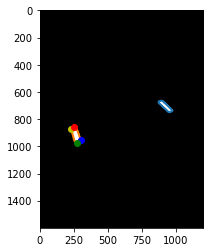

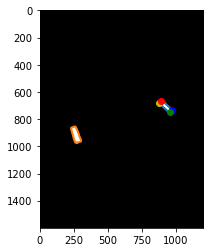

In [86]:
Width_A, Height_A, max_x_A, max_y_A, min_x_A, min_y_A = find(contours_pink, mask_pink, 2)

print("max_x_A[0] = ", max_x_A[0])
print("min_y_A[1] = ", min_y_A[1])
print("Height_A[0] = ", Height_A[0])
print("Height_A[1] = ", Height_A[1])

WIDTH_A = max_x_A[0][1] - min_y_A[1][1] #по х
if Height_A[0] > Height_A[1]:
    HEIGHT_A = Height_A[0]
else:
    HEIGHT_A = Height_A[1]

print("WIDTH_A = ", WIDTH_A)
print("HEIGHT_A = ", HEIGHT_A)

#print(Width_A)
#print(Height_A)
print(max_x_A)
print(max_y_A)
print(min_x_A)
print(min_y_A)

blue =  [732.  974.2]
yellow =  [679.  874.8]
red =  [664.8 890. ]
green =  [747.2 958. ]
blue =  [953.  303.2]
yellow =  [875.  230.8]
red =  [854.8 254. ]
green =  [973.2 275. ]
Weidth_A =  699.2
Height_A =  98.20000000000005
max_x_A1 =  [732.  974.2]
min_y_A2 =  [973.2 275. ]
Height_A1 =  68.20000000000005
Height_A2 =  98.20000000000005
699.2
98.20000000000005


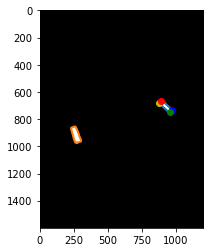

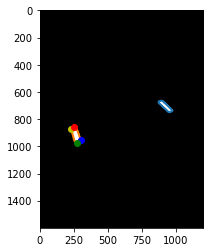

In [92]:
from matplotlib.patches import Rectangle

def find_size3(contour, contours, mask_draw):
    max_x = contour[0]
    max_y = contour[0]
    min_x = contour[0]
    min_y = contour[0]
    for i in range(len(contour)):
        pair = contour[i]
        if max_x[1] < pair[1]:
            max_x = pair
        if min_x[1] > pair[1]:
            min_x = pair
        if min_y[0] < pair[0]:
            min_y = pair
        if max_y[0] > pair[0]:
            max_y = pair

    print("blue = ", max_x) #min_y
    print("yellow = ", min_x) #max_y
    print("red = ", max_y) #max_x
    print("green = ", min_y) #min_x
    
    fig, ax = plt.subplots()
    ax.imshow(mask_draw, cmap=plt.cm.gray)
    contour = contours[0]
    for contour in contours:
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

    ax.plot(max_x[1], max_x[0], 'bo') #max_y --> самая правая (max_x)
    ax.plot(min_x[1], min_x[0], 'yo') #min_y --> самая левая (min_x)
    ax.plot(max_y[1], max_y[0], 'ro') #min_x --> самая верхняя (max_y)
    ax.plot(min_y[1], min_y[0], 'go') #max_x --> самая нижнаяя (min_y)
    weidth = max_x[1] - min_y[1]
    height = min_y[0] - min_x[0] #по у
    
    return weidth, height, max_x, max_y, min_x, min_y

if len(contours_pink) == 2:
    Weidth_A1, Height_A1, max_x_A1, max_y_A1, min_x_A1, min_y_A1 = find_size3(contours_pink[0], contours_pink, mask_pink)
    Weidtht_A2, Height_A2, max_x_A2, max_y_A2, min_x_A2, min_y_A2 = find_size3(contours_pink[1], contours_pink, mask_pink)
    d_11 = np.sqrt((max_x_A1[1] - max_y_A1[1])**2 + (max_x_A1[0] - max_y_A1[0])**2) #по у правильнее!!!

    print("Weidth_A = ", Weidth_A)
    print("Height_A = ", Height_A)
    print("max_x_A1 = ", max_x_A1)
    print("min_y_A2 = ", min_y_A2)
    print("Height_A1 = ", Height_A1)
    print("Height_A2 = ", Height_A2)
    
    Weidth_A = max_x_A1[1] - min_y_A2[1] #по х
    if Height_A1 > Height_A2:
        Height_A = Height_A1
    else:
        Height_A = Height_A2

    print(Weidth_A)
    print(Height_A)
else:
    print('ERROR')
    Weidth_A = 0
    Height_A = 0

In [7]:
def check(Width_A, Height_A, Widht_B, Height_B):
    print("Check:")
    if Width_A >= Widht_B:
        print("Width A >= width B")
        rW = 1
    else:
        print("WARNING: Weidth A < weidth B")
        rW = 0
    if Height_A >= Height_B:
        print("Height A >= height B")
        rH = 1
    else:
        print("WARNING: Height A < height B")
        rH = 0
    print("\n")
    return rW and rH

def check_result(WIDTH_A, HEIGHT_A, WIDTH_B, HEIGHT_B):
    if WIDTH_A != 0 and HEIGHT_A != 0 and WIDTH_B != 0 and HEIGHT_B != 0:
        res = check(WIDTH_A, HEIGHT_A, WIDTH_B, HEIGHT_B)
    else:
        print("ERROR: this image can't be processed")
        res = 0
    if res == 0:
        print("False")
    else:
        print("True")
    print("\n")
    return res